C:\Users\70018928\AppData\Local\Continuum\anaconda3\envs\quandl\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


 >>>>>>>>  10Y US Gov Treasury vs Earning Yield <<<<<<<<<<
 Intepret by looking at 10Y US Gov Treasury relative to EY representing the interest of market toward Bond or Stocks 


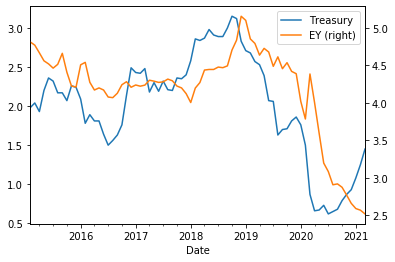

 >>>>>>>>  EYG vs Price <<<<<<<<<<
 ..... Mean , 1SD and 2SD displayed .....
 Intepret by considering EYG relative to SD lines 
Corr EYG vs Price : -0.2822160052346676


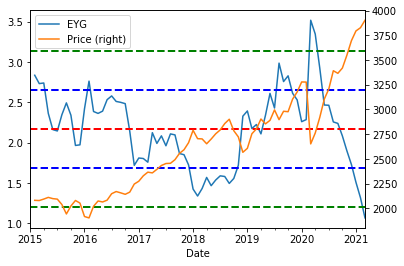

 >>>>>>>>  EPS vs Price <<<<<<<<<<
 EPS as a driver of Price : trend in opposite direction means market is over or undervalued 
Corr EPS vs Price : 0.4230597401229468


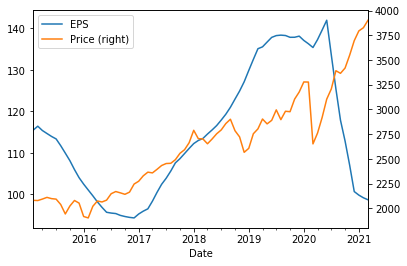

In [1]:
# should ther be an error about chrome version, check version and download the right version to replace the old one
# ref: https://stackoverflow.com/questions/60296873/sessionnotcreatedexception-message-session-not-created-this-version-of-chrome

# How to compute rolling SD
# ref: https://towardsdatascience.com/dont-miss-out-on-rolling-window-functions-in-pandas-850b817131db

### Telling if US market is over or undervalued and if there is growth driver in the market

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

from datetime import datetime, timedelta, date

import requests
from lxml import html as HTMLParser


startdate=datetime(2015, 1, 1)
enddate=datetime.now()

pe_url = 'http://www.multpl.com/table?f=m'

## Shiller PE
#pe_url='https://www.multpl.com/shiller-pe/table/by-month'
price_url = 'http://www.multpl.com/s-p-500-historical-prices/table/by-month'
treasury_url='https://www.multpl.com/10-year-treasury-rate/table/by-month'
earning_url='https://www.multpl.com/s-p-500-earnings/table/by-month'

def get_data_from_multpl_website(url):
    headers = {
        'User-Agent': (
            'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 '
            '(KHTML, like Gecko) Chrome/63.0.3239.108 Safari/537.36'
        )
    }
    res = requests.get(url, headers=headers)
    parsed = HTMLParser.fromstring(res.content.decode('utf-8'))
    tr_elems = parsed.cssselect('#datatable tr')
    raw_data = [[td.text.strip() for td in tr_elem.cssselect('td')] for tr_elem in tr_elems[1:]]
    return raw_data


pe_data = get_data_from_multpl_website(pe_url)
price_data = get_data_from_multpl_website(price_url)
treasury_data=get_data_from_multpl_website(treasury_url)
earning_data=get_data_from_multpl_website(earning_url)
# merged is the final merged raw data
merged = [[pe_row[0], pe_row[1], price_row[1], treasury_row[1], earning_row[1]] for pe_row, price_row, treasury_row, earning_row in zip(pe_data, price_data, treasury_data, earning_data)]

# get first few rows
#print(merged[:5])

df = pd.DataFrame(merged, columns=['Date', 'PE', 'Price','Treasury','EPS'])

# parse date formats
df.Date = pd.to_datetime(df.Date, format='%b %d, %Y')
# transform to numeric values
df.PE = pd.to_numeric(df.PE)
df.Price = pd.to_numeric(df.Price.str.replace(',', '').astype(float))  # handle commas inside strings
df.EPS = pd.to_numeric(df.EPS.str.replace(',', '').astype(float))  # handle commas inside strings
df.Treasury = pd.to_numeric(df.Treasury.str.replace('%', '').astype(float))  # handle commas inside strings
df['EY']=100*(1.0/df['PE'])
df['EYG']=df['EY']-df['Treasury']
df = df.set_index('Date')

df1 = df.loc[df.index > startdate]
df1.is_copy = False
df1.Price = df1.Price 

df2=df1.reset_index().copy()
#display(df2)

del df, df1, merged

# ax = df2.plot('Date','PE')
# df2.plot('Date','Price',secondary_y=True, ax=ax)
# ax = df2.plot('Date','EY')
# df2.plot('Date','EYG',secondary_y=True, ax=ax)

#print('Corr PE vs Price :',np.corrcoef(df2.PE, df2.Price)[1][0])
print(' >>>>>>>>  10Y US Gov Treasury vs Earning Yield <<<<<<<<<<')
print(' Intepret by looking at 10Y US Gov Treasury relative to EY representing the interest of market toward Bond or Stocks ')
ax = df2.plot('Date','Treasury')
df2.plot('Date','EY',secondary_y=True, ax=ax)
plt.show()

print(' >>>>>>>>  EYG vs Price <<<<<<<<<<')
print(' ..... Mean , 1SD and 2SD displayed .....')
print(' Intepret by considering EYG relative to SD lines ')
print('Corr EYG vs Price :',np.corrcoef(df2.EYG, df2.Price)[1][0])
ax = df2.plot('Date','EYG')
#ax[1].plot(df2[['SD Price']])
ax.axhline(y=df2['EYG'].mean(), color='r', linestyle='--', lw=2)
ax.axhline(y=df2['EYG'].mean()-df2['EYG'].std(), color='b', linestyle='--', lw=2)
ax.axhline(y=df2['EYG'].mean()+df2['EYG'].std(), color='b', linestyle='--', lw=2)
ax.axhline(y=df2['EYG'].mean()-2*df2['EYG'].std(), color='g', linestyle='--', lw=2)
ax.axhline(y=df2['EYG'].mean()+2*df2['EYG'].std(), color='g', linestyle='--', lw=2)
df2.plot('Date','Price',secondary_y=True, ax=ax)
plt.gca().set_xbound(startdate,enddate)
plt.show()

print(' >>>>>>>>  EPS vs Price <<<<<<<<<<')
print(' EPS as a driver of Price : trend in opposite direction means market is over or undervalued ')
print('Corr EPS vs Price :',np.corrcoef(df2.EPS, df2.Price)[1][0])
ax = df2.plot('Date','EPS')
df2.plot('Date','Price',secondary_y=True, ax=ax)
plt.show()






#print(np.corrcoef(df.PE, df.Price))

C:\Users\70018928\AppData\Local\Continuum\anaconda3\envs\quandl\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


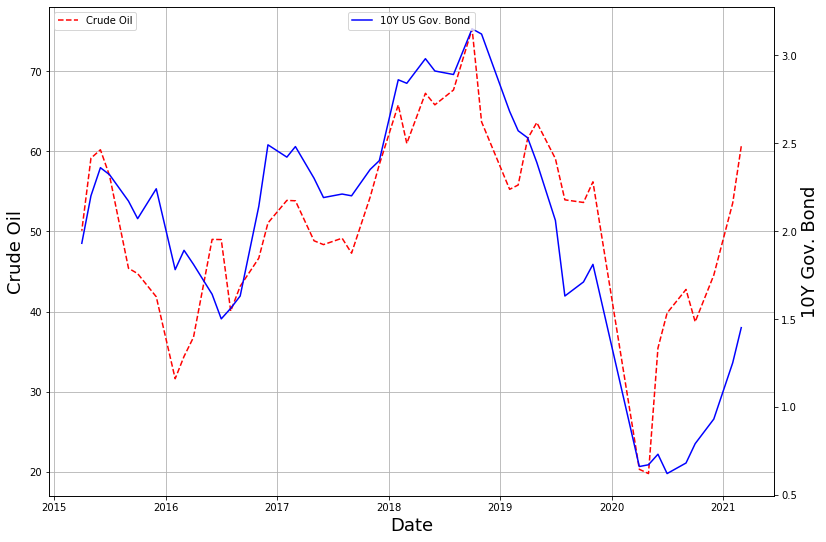

 Crude Oil Price:  High Crude Oil price could drive Inflation to go up which is a signal of bad economic condition ???


In [2]:
from pandas_datareader import data

groupList=['CL=F']

dfIn= data.DataReader(groupList,start=startdate,data_source='yahoo') #['Adj Close']

treasuryDf=df2[['Date','Treasury']].set_index('Date')
oilDf=pd.DataFrame(dfIn['Adj Close']['CL=F'].copy())

merge=pd.merge(treasuryDf,oilDf,how='inner', left_index=True, right_index=True)

fig, axs=plt.subplots(figsize=(13,9))
ax2=axs.twinx()
axs.plot(merge['CL=F'], label='Crude Oil', color='red',linestyle='--', alpha=2)
ax2.plot(merge['Treasury'], label='10Y US Gov. Bond', color='blue', alpha=2)
plt.xticks(rotation=45)
axs.set_xlabel('Date', fontsize=18)
axs.set_ylabel('Crude Oil', fontsize=18)
ax2.set_ylabel('10Y Gov. Bond', fontsize=18)
axs.legend(loc='upper left')
ax2.legend(loc='upper center')
axs.grid()
plt.show()  

print(' Crude Oil Price:  High Crude Oil price could drive Inflation to go up which is a signal of bad economic condition ???')

# High Crude Oil price could drive Inflation. 10Y Gov. Bond Yield could show the signal of inflation trend. Lower trend in Bond Yield could show a signal of coming inflation if the crude oil keeps going up.
ref: https://www.youtube.com/watch?v=JQkHFxlp888&ab_channel=FINNOMENA

ref: https://www.investopedia.com/articles/bonds/09/bond-market-interest-rates.asp

KEY TAKEAWAYS

-Bonds are subject to interest rate risk, since rising rates will result in falling prices (and vice-versa).  Bond against Interest

-Interest rates respond to inflation: when prices in an economy rise, the central bank typically raises its target rate to cool down an overheating economy.  (Interest rate used to stop Inflation. => High Interest reduces Inflation)

-Inflation also erodes the real value of a bond's face value, which is a particular concern for longer maturity debts. (High Inflation, Low Bond Value)

-Because of these linkages, bond prices are quite sensitive to changes in inflation and inflation forecasts.

 >>> Bond Yield = Real Yield + Inflation, To have positive impact to stock market, Bond Yield must go down; thus, Real Yield must be small enough to compensate the inflation which could be higher due to economic condition.


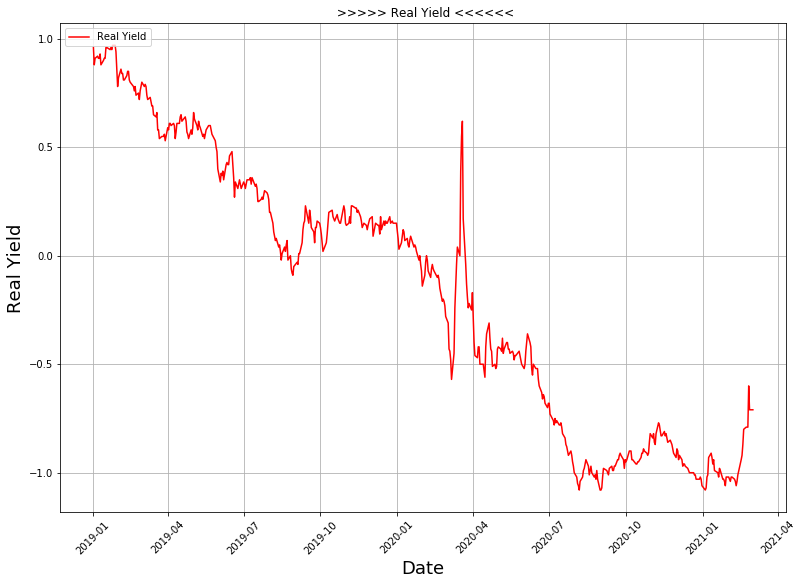

In [3]:
import pandas as pd
from selenium import webdriver
from datetime import datetime
import numpy as np
from ScrapingData.Operations_Benchmark_2 import *
import matplotlib.pyplot as plt

readSheetB=ReadSheet_Benchmark()
sheetGeneral=readSheetB.Authorization_Benchmark()

dfList=[]
for n in range(0,len(sheetGeneral)):
    dfIn=readSheetB.LoadSheet_0(sheetGeneral[n])
    dfList.append(dfIn)
    
#dfList
elementDict=dict(zip(catDict['benchmarker'],dfList))

del dfList

dfOp=elementDict['RealYield'].copy()
dfOp=dfOp[['Date','Price']]

dfOp=dfOp.set_index('Date')

print(' >>> Bond Yield = Real Yield + Inflation, To have positive impact to stock market, Bond Yield must go down; thus, Real Yield must be small enough to compensate the inflation which could be higher due to economic condition.')

fig, axs=plt.subplots(figsize=(13,9))
#dfOp.plot(y="Price")
axs.plot(dfOp['Price'], label='Real Yield', color='red', alpha=2)
plt.xticks(rotation=45)
axs.set_title(' >>>>> Real Yield <<<<<<')
axs.set_xlabel('Date', fontsize=18)
axs.set_ylabel('Real Yield', fontsize=18)
axs.legend(loc='upper left')
axs.grid()
plt.show()